In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./results/mdi_local.real_data/realdata2/varying_sample_row_n/seed331/results.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head(20)

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,random_state,include_raw,model,fi,splitting_strategy,fi_time,AUC_before_ablation,AUC_after_ablation_1,AUC_after_ablation_2,AUC_after_ablation_3,AUC_after_ablation_4,AUC_after_ablation_5,AUC_after_ablation_6,AUC_after_ablation_7,AUC_after_ablation_8,AUC_after_ablation_9,AUC_after_ablation_10,AUC_after_ablation_11,AUC_after_ablation_12,AUC_after_ablation_13,AUC_after_ablation_14,AUC_after_ablation_15,AUC_after_ablation_16,AUC_after_ablation_17,AUC_after_ablation_18,AUC_after_ablation_19,AUC_after_ablation_20,AUC_after_ablation_21,AUC_after_ablation_22,AUC_after_ablation_23,ablation_time,test_size,split_seed,index,var,true_support
0,NaN,None,0,100,1,sqrt,42,NaN,RF,LFI_absolute_sum_evaluate,train-test,2629.522422,0.786516,0.755888,0.713989,0.679652,0.647200,0.618021,0.600509,0.581341,0.571972,0.557276,0.548204,0.538526,0.526874,0.519443,0.519024,0.515432,0.505608,0.501768,0.498430,0.499717,0.498072,0.498267,0.498604,0.496953,1.520578,3452,331,0,0,1.0
1,NaN,None,0,100,1,sqrt,42,False,RF,LFI_absolute_sum_evaluate_without_raw,train-test,2666.941783,0.786516,0.753419,0.711289,0.672495,0.650583,0.626491,0.606763,0.590663,0.577682,0.565056,0.550539,0.541684,0.533107,0.520207,0.510722,0.503091,0.502013,0.495843,0.495257,0.491534,0.496028,0.495994,0.498385,0.496953,1.618322,3452,331,1,0,1.0
2,NaN,None,0,100,1,sqrt,42,NaN,RF,LIME,train-test,350.112543,0.786516,0.757467,0.722384,0.684311,0.644223,0.617412,0.592406,0.575379,0.565389,0.557043,0.552754,0.549067,0.542980,0.538542,0.531339,0.523074,0.516794,0.511489,0.508085,0.508380,0.505848,0.504959,0.502301,0.496953,1.531180,3452,331,2,0,1.0
3,NaN,None,0,100,1,sqrt,42,NaN,RF,TreeSHAP,train-test,140.065821,0.786516,0.745556,0.695844,0.660415,0.626707,0.601056,0.575702,0.563898,0.550066,0.542366,0.535284,0.524924,0.513325,0.507348,0.505178,0.503654,0.499803,0.498838,0.500940,0.502229,0.496794,0.497832,0.494479,0.496953,1.323706,3452,331,3,0,1.0


In [11]:
# methods = ["MDI_all_stumps", "MDI_sub_stumps", "MDI_all_stumps_without_raw", "MDI_sub_stumps_without_raw", "LFI_sum_absolute_all_stumps",
#            "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_sub_stumps", "LFI_absolute_sum_sub_stumps", 
#            "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
#            "LFI_sum_absolute_sub_stumps_without_raw", "LFI_absolute_sum_sub_stumps_without_raw", "TreeSHAP", "LIME"]

methods = ["LFI_absolute_sum_evaluate","LFI_absolute_sum_evaluate_without_raw","TreeSHAP", "LIME"] #["MDI_local_all_stumps_evaluate", "MDI_local_all_stumps_evaluate_without_raw","LFI_absolute_sum_evaluate","LFI_absolute_sum_evaluate_without_raw","TreeSHAP", "LIME"]
sample_row_n = df["sample_row_n"].unique().tolist()
sample_row_n.sort()
train_test_map = {}
for i in range(len(sample_row_n)):
    train_test_map[sample_row_n[i]] = i
nreps = df["rep"].max()
num_features = 23
n_testsize = df[['sample_row_n', 'test_size']].drop_duplicates()
results = {}

for s in sample_row_n:
    results[s] = {}
    for m in methods:
        results[s][m] = {}
        for r in range(nreps+1):
            results[s][m][r] = []

In [12]:
sample_row_n[0]

nan

In [13]:
for s in sample_row_n:
    for m in methods:
        for r in range(nreps+1):
            df_sub = df[(df["fi"] == m) & (df["rep"] == r)] #& (df["sample_row_n"] == s)  
            assert len(df_sub["AUC_before_ablation"].unique()) == 1
            results[s][m][r].append(df_sub["AUC_before_ablation"].unique()[0])
            for i in range(num_features):
                assert len(df_sub[f"AUC_after_ablation_{i+1}"].unique()) == 1
                results[s][m][r].append(df_sub[f"AUC_after_ablation_{i+1}"].unique()[0])

In [14]:
agg_results = {} 
for s in sample_row_n:
    agg_results[s] = {}
    for m in methods:
        agg_results[s][m] = None

In [15]:
for s in sample_row_n:
    for m in methods:
        result = []
        for f in range(num_features+1):
            result.append(np.mean([results[s][m][r][f] for r in range(nreps+1)]))          
        agg_results[s][m] = result

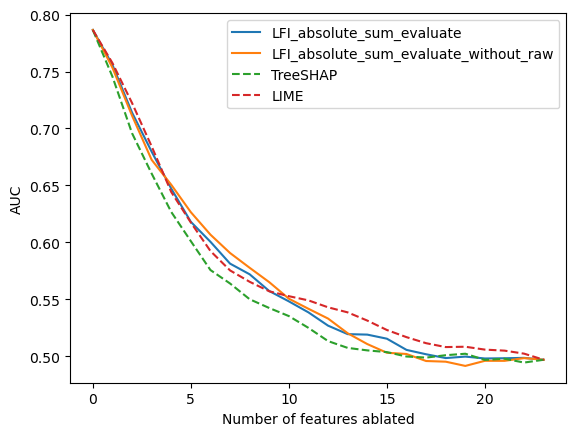

In [16]:
# Plotting
for j in range(len(sample_row_n)):
    s = sample_row_n[j]
    fig, ax = plt.subplots()
    for m in methods:
        if m in ["TreeSHAP", "LIME"]:
            ax.plot(range(num_features+1), agg_results[s][m], label=m, linestyle='dashed')
        else:
            ax.plot(range(num_features+1), agg_results[s][m], label=m)
    ax.set(xlabel='Number of features ablated', ylabel='AUC')#,
            #title=f'Train size = {s - n_testsize[n_testsize["n"] == s]["test_size"].values[0]}, Test size = {n_testsize[n_testsize["n"] == s]["test_size"].values[0]}')
    ax.legend()
    plt.show()